In [3]:
from google.colab import files
file_upload = files.upload()

Saving Retail_Sales.csv to Retail_Sales (1).csv


In [43]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec
import seaborn as sns
import datetime as dt


In [5]:
sales_data = pd.read_csv('Retail_Sales.csv')

In [6]:
sales_data.head()

,OrderID,CustomerName,Category,ProductName,Region,OrderDate,Quantity,Price,TotalSales
0,bd69f24a,Peter Dunn,Clothing,Coffee Table,South,2023-05-07,4,95.44,381.76
1,7062cd52,Hunter Miller,Electronics,Tablet,North,2023-01-31,1,348.56,348.56
2,45d0a7a9,Kimberly Malone,Clothing,Chair,South,2024-10-29,1,199.50,199.50
3,0d493079,Crystal Porter,Clothing,Smartphone,North,2023-03-04,10,469.00,4690.00
4,b7fb0716,Alex Delacruz,Electronics,Chair,North,2024-04-27,4,77.39,309.56


In [7]:
sales_data.tail()

,OrderID,CustomerName,Category,ProductName,Region,OrderDate,Quantity,Price,TotalSales
45,036a2b97,Dorothy Santana,Clothing,Smartwatch,South,2023-09-03,10,332.23,3322.30
46,60fb5ebd,Wendy Campbell,Furniture,Tablet,West,2024-09-18,3,288.47,865.41
47,458db2d5,Christopher Heath,Electronics,Jacket,West,2023-12-19,3,55.90,167.70
48,9911c1ca,Darren Gallegos,Furniture,Headphones,West,2024-01-10,4,190.18,760.72
49,8e60f463,Megan Pham,Furniture,Laptop,North,2024-01-06,7,139.95,979.65


In [8]:
sales_data.shape

(50, 9)

In [9]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       50 non-null     object 
 1   CustomerName  50 non-null     object 
 2   Category      50 non-null     object 
 3   ProductName   50 non-null     object 
 4   Region        50 non-null     object 
 5   OrderDate     50 non-null     object 
 6   Quantity      50 non-null     int64  
 7   Price         50 non-null     float64
 8   TotalSales    50 non-null     float64
dtypes: float64(2), int64(1), object(6)
memory usage: 3.6+ KB


In [10]:
sales_data.describe()

,Quantity,Price,TotalSales
count,50.000000,50.000000,50.000000
mean,4.400000,255.678400,1229.666000
std,2.718043,144.080196,1200.372729
min,1.000000,12.480000,14.510000
25%,2.000000,126.815000,315.517500
50%,4.000000,285.260000,759.110000
75%,6.000000,364.032500,1969.470000
max,10.000000,469.000000,4690.000000


In [11]:
sales_data.isnull().sum()

,0
OrderID,0
CustomerName,0
Category,0
ProductName,0
Region,0
OrderDate,0
Quantity,0
Price,0
TotalSales,0


In [12]:
sales_data.duplicated().sum()

np.int64(0)

# Cleaning Data

In [13]:
sales_data.drop_duplicates(inplace=True)

In [14]:
# set the data types of columns , after loading
sales_data = sales_data.astype({'Region':'category', 'Category':'category'})


In [15]:
# Display summary statistics (count, mean, std, min, quartiles, max)
# for all numeric columns in the sales_data DataFrame, transposed for readability
sales_data.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,50.0,4.4000,2.718043,1.00,2.0000,4.00,6.0000,10.0
Price,50.0,255.6784,144.080196,12.48,126.8150,285.26,364.0325,469.0
TotalSales,50.0,1229.6660,1200.372729,14.51,315.5175,759.11,1969.4700,4690.0


In [16]:
sales_data.columns

Index(['OrderID', 'CustomerName', 'Category', 'ProductName', 'Region',
       'OrderDate', 'Quantity', 'Price', 'TotalSales'],
      dtype='object')

In [17]:
# Convert the 'OrderDate' column from string to datetime format (YYYY-MM-DD)
sales_data['OrderDate'] = pd.to_datetime(sales_data['OrderDate'], format='%Y-%m-%d')

In [18]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderID       50 non-null     object        
 1   CustomerName  50 non-null     object        
 2   Category      50 non-null     category      
 3   ProductName   50 non-null     object        
 4   Region        50 non-null     category      
 5   OrderDate     50 non-null     datetime64[ns]
 6   Quantity      50 non-null     int64         
 7   Price         50 non-null     float64       
 8   TotalSales    50 non-null     float64       
dtypes: category(2), datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 3.3+ KB


#Exploratary Data Analysis

In [19]:
# Select column names with numeric data types (e.g., int, float)
Numeric_Columns = sales_data.select_dtypes(include=np.number).columns

# Select column names with non-numeric data types (e.g., object, category, datetime)
Categorical_Columns = sales_data.select_dtypes(exclude=np.number).columns


In [20]:
Numeric_Columns.to_list()

['Quantity', 'Price', 'TotalSales']

In [21]:
Categorical_Columns.to_list()

['OrderID', 'CustomerName', 'Category', 'ProductName', 'Region', 'OrderDate']

# Visualise Numeric column -> Boxplot,KDIplot,Distributuin /Histogram plot

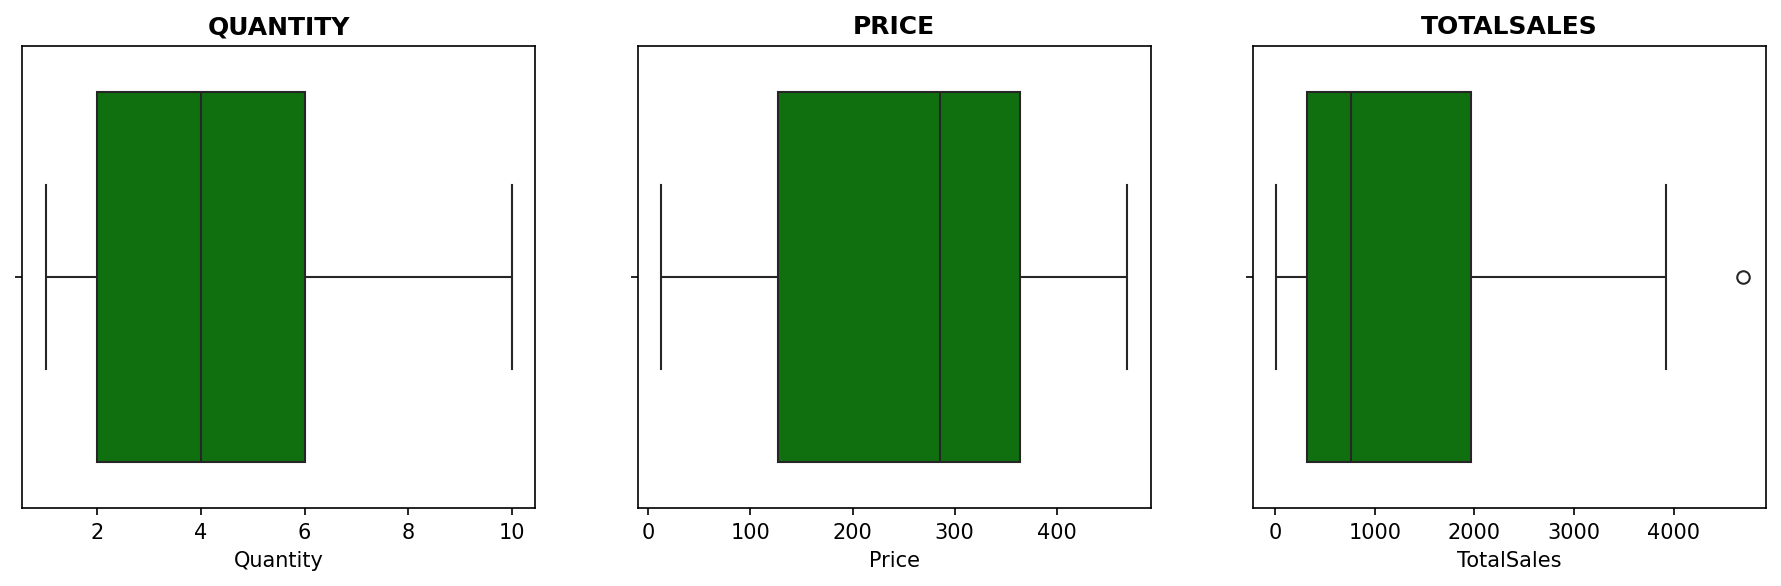

In [22]:
fig, axes = plt.subplots(ncols = 3, figsize = (15,4), dpi = 150)
for col, axis in zip(Numeric_Columns, axes):
    sns.boxplot(sales_data, x = sales_data[col], ax = axis, color = 'green')
    axis.set_title(col.upper(), fontweight = 'bold')


/tmp/ipython-input-23-3907272988.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Variable', y='Value', data=numeric_data, palette='pastel')


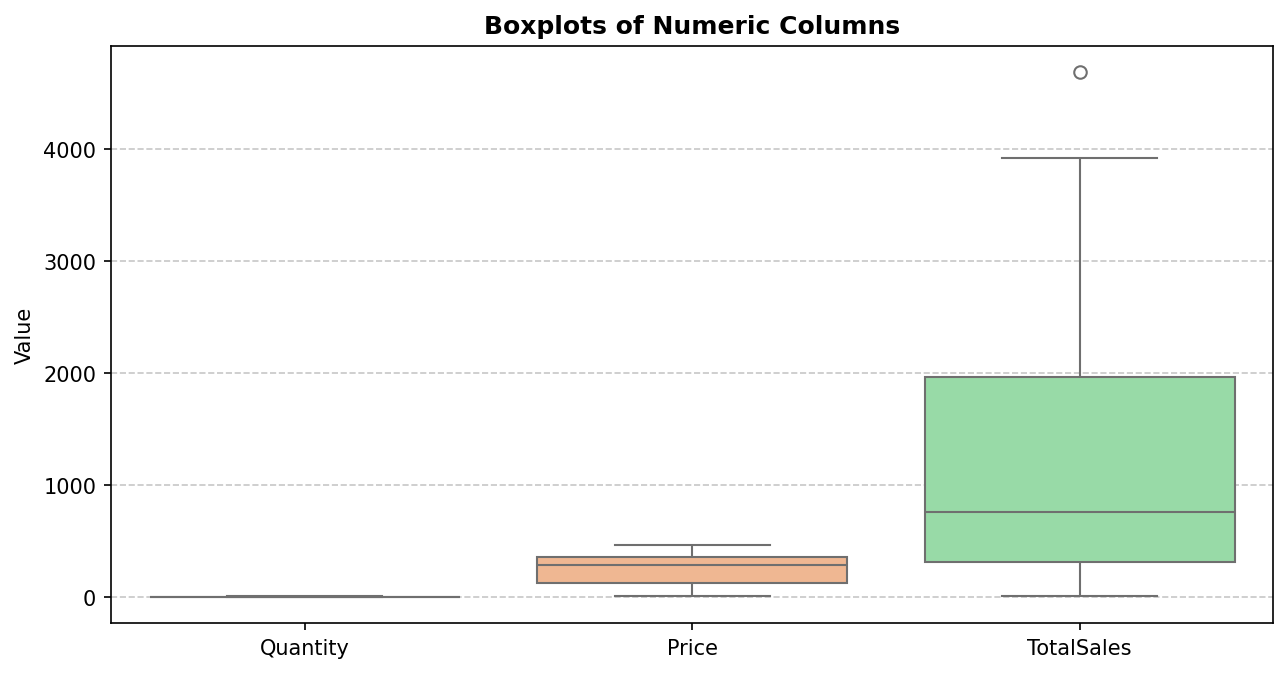

In [23]:
# Melt the dataframe to long format for seaborn
numeric_data = sales_data[['Quantity', 'Price', 'TotalSales']].melt(var_name='Variable', value_name='Value')

# Create the boxplot
plt.figure(figsize=(10, 5), dpi=150)
sns.boxplot(x='Variable', y='Value', data=numeric_data, palette='pastel')
plt.title('Boxplots of Numeric Columns', fontweight='bold')
plt.xlabel('')
plt.ylabel('Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

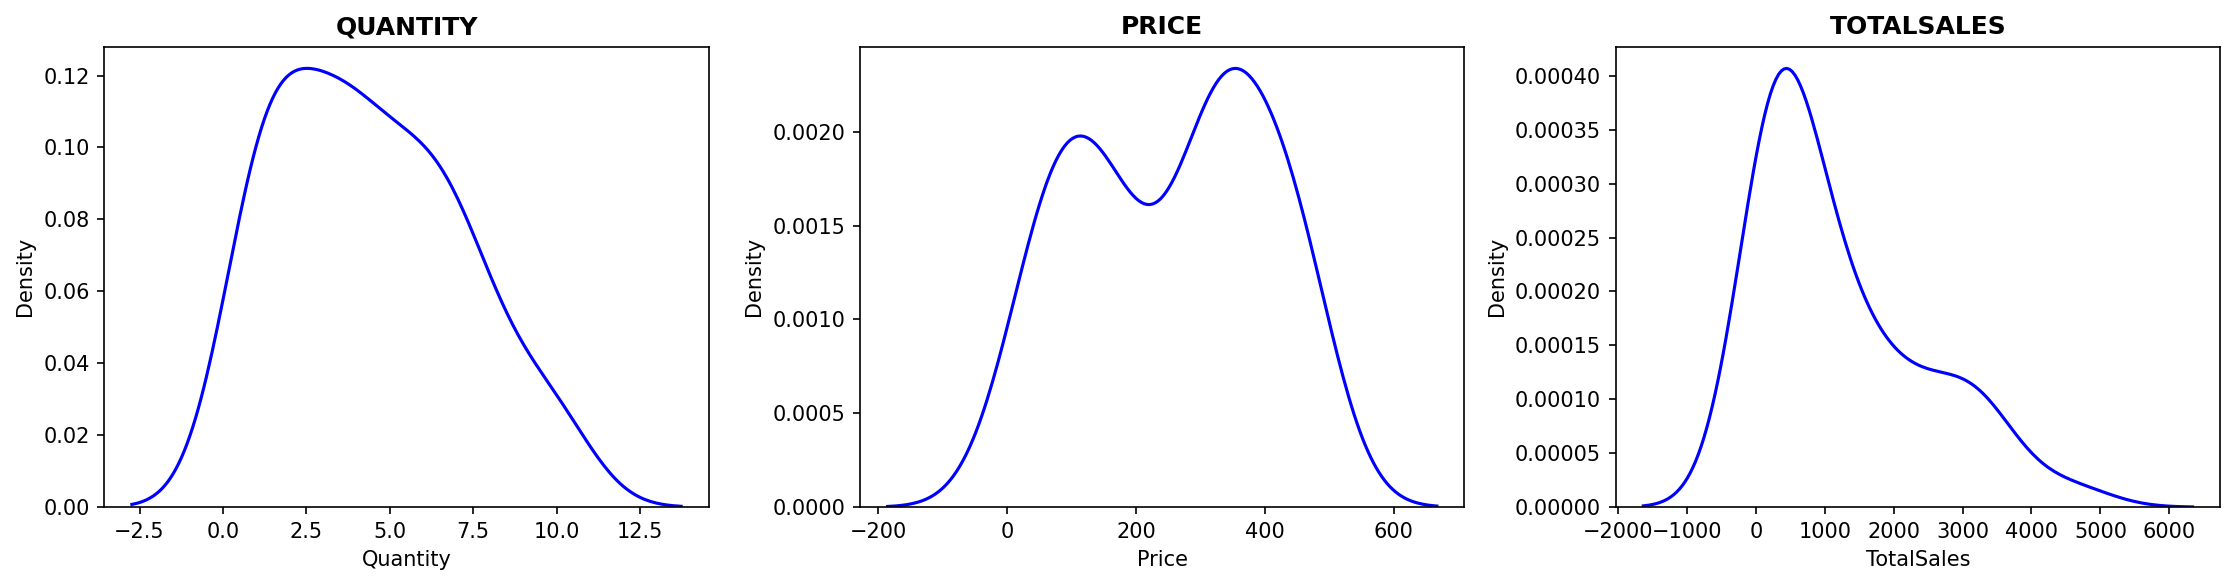

In [24]:
fig , axes = plt.subplots(ncols = 3, figsize = (15,4), dpi = 150)
for col,axs in zip(Numeric_Columns,axes):
  sns.kdeplot(data = sales_data[col], ax = axs, color = 'blue')
  axs.set_title(col.upper(), fontweight = 'bold')
plt.tight_layout()
plt.show()



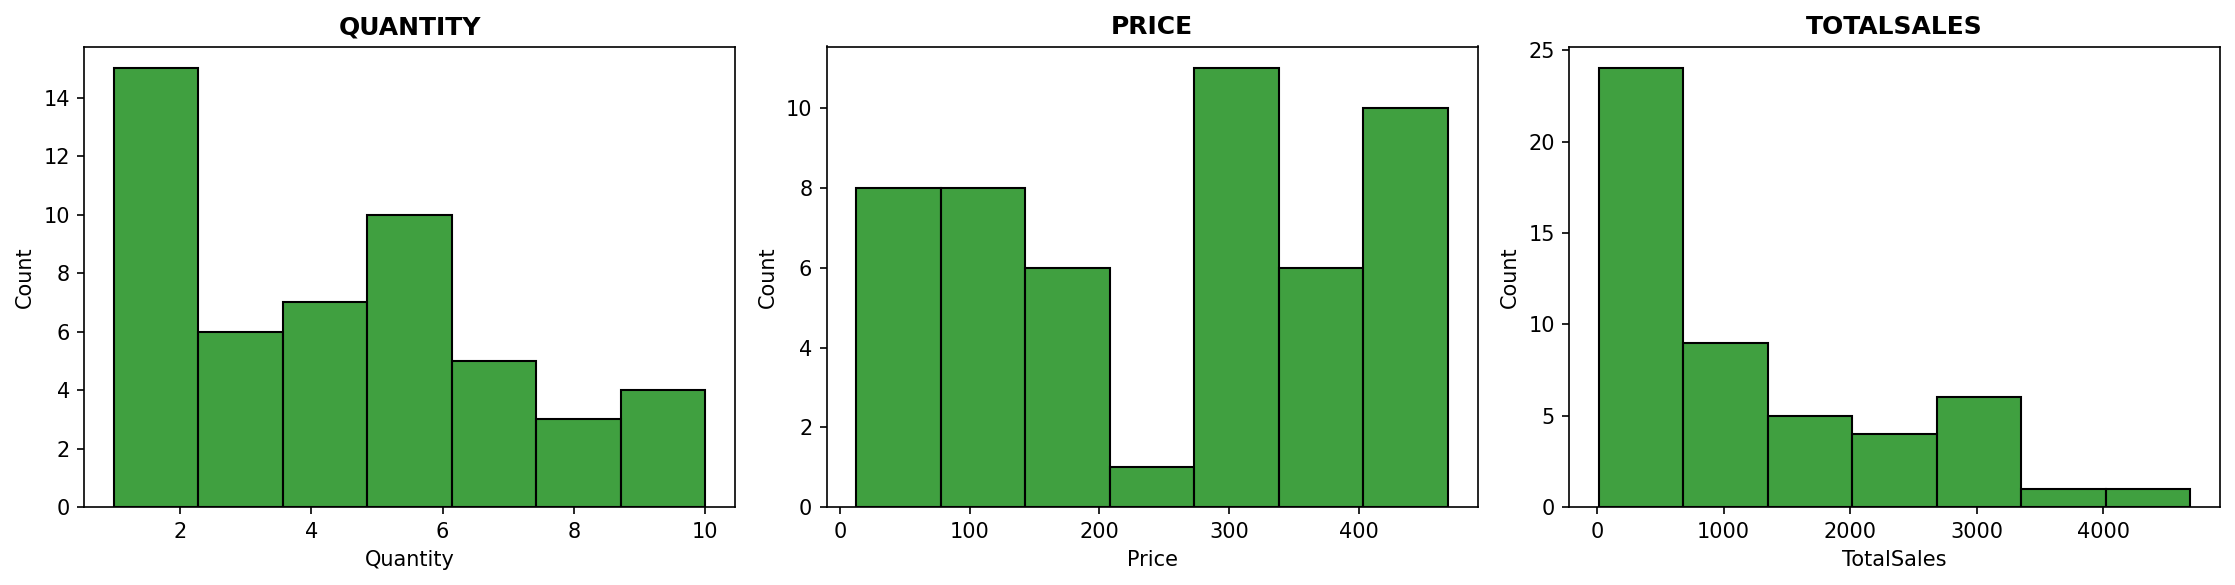

In [25]:
#Distribution (Histogram Plot) of Numeric Columns
fig, axs =plt.subplots(ncols=3, figsize = (15,4), dpi = 150)
for col, axis in zip(sales_data[Numeric_Columns], axs):
  sns.histplot(data =sales_data, x = sales_data[col], ax= axis, color = 'green')
  axis.set_title(col.upper(), fontweight = 'bold')
plt.tight_layout()
plt.show()


# Correlation Matrix of all Numeric Columns

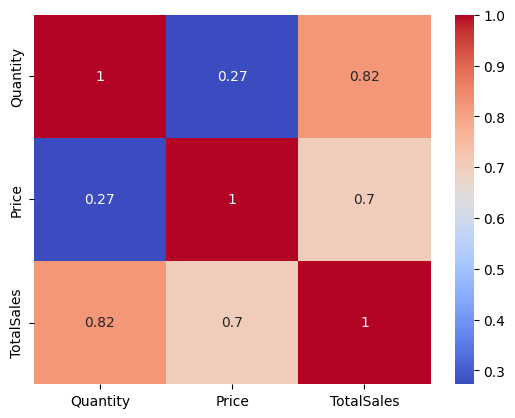

In [26]:
Matri_corr_Reatail = sales_data[Numeric_Columns].corr()
sns.heatmap(Matri_corr_Reatail, annot = True, cmap = 'coolwarm')
plt.show()

#Visualisation of Categorical Variables / *Columns*

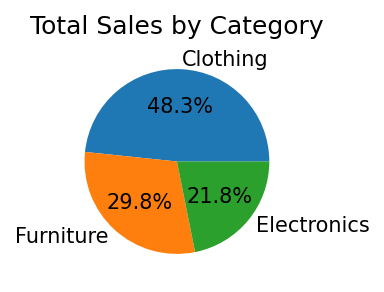

In [27]:
# Total Sales by Category
# using pie chart
sales_by_category = sales_data.groupby('Category', observed=False)['TotalSales'].sum().reset_index()
sales_by_category.sort_values(by='TotalSales', ascending=False, inplace=True)
sales_by_category.reset_index(drop=True, inplace=True)
sales_by_category

plt.figure(figsize = (3,2), dpi = 150)
plt.pie(sales_by_category['TotalSales'], labels = sales_by_category['Category'], autopct = '%1.1f%%')
plt.title('Total Sales by Category')
plt.show()




In [28]:
# Average Quantity Sold by Regionr
avarage_Quntitity_by_Region = sales_data.groupby('Region', observed=False)['Quantity'].mean().reset_index()
avarage_Quntitity_by_Region.sort_values(by='Quantity', ascending=False, inplace=True)
avarage_Quntitity_by_Region.reset_index(drop=True, inplace=True)
avarage_Quntitity_by_Region



,Region,Quantity
0,South,5.000000
1,North,4.857143
2,East,4.500000
3,West,3.357143


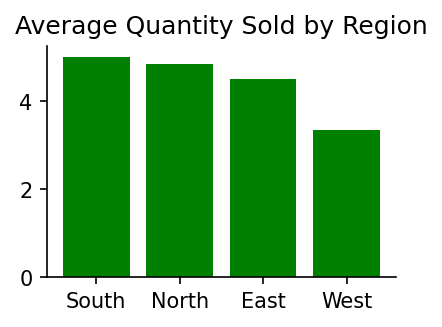

In [29]:
#
plt.figure(figsize = (3,2), dpi = 150)
plt.bar(avarage_Quntitity_by_Region['Region'], avarage_Quntitity_by_Region['Quantity'], color = 'green')
plt.title('Average Quantity Sold by Region')
sns.despine()
plt.show()

In [30]:
#  Total Sales by Region and Category
total_sales_by_region_category = sales_data.groupby(['Region','Category'], observed=False)['TotalSales'].sum().reset_index()
total_sales_by_region_category.sort_values(by='TotalSales', ascending=False, inplace=True)
total_sales_by_region_category.reset_index(drop=True, inplace=True)
total_sales_by_region_category

,Region,Category,TotalSales
0,North,Clothing,12275.99
1,South,Clothing,9281.26
2,East,Electronics,6513.04
3,West,Furniture,6493.25
4,North,Furniture,6261.02
5,South,Electronics,4519.34
6,East,Clothing,4213.78
7,West,Clothing,3954.71
8,East,Furniture,2888.47
9,South,Furniture,2680.96


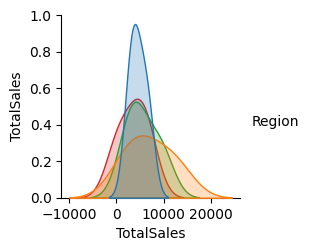

In [31]:
# using pirplot for usilaising total_sales_by_region_category
sns.pairplot(total_sales_by_region_category, hue = 'Region')
plt.show()

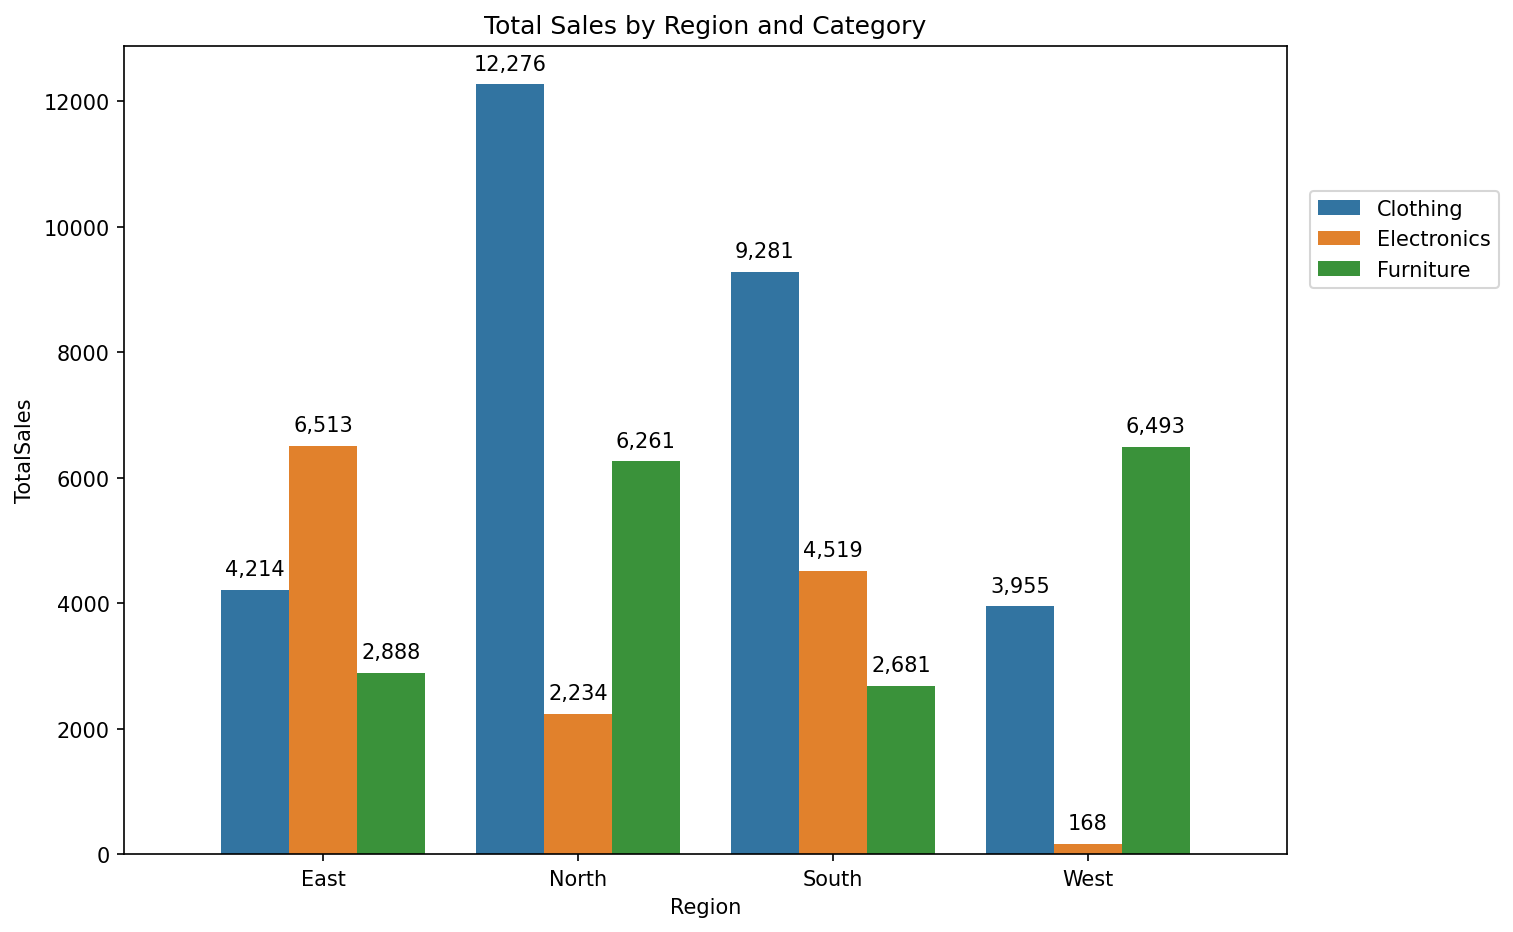

In [32]:
#barplot usilaising total_sales_by_region_category
plt.figure(figsize = (10,7), dpi = 150)
ax = sns.barplot(data = total_sales_by_region_category, x = 'Region', y = 'TotalSales', hue = 'Category')
plt.title('Total Sales by Region and Category')

ax.margins(x=0.1)
for i in ax.containers:
    ax.bar_label(i, fmt='{:,.0f}', padding=5)
plt.legend(loc = (1.02, 0.7));

In [33]:
#Top 10 Products by Total Sales
top_10_products = sales_data.groupby('ProductName', observed=False)['TotalSales'].sum().reset_index()
top_10_products.sort_values(by='TotalSales', ascending=False, inplace=True)
top_10_products.reset_index(drop=True, inplace=True)
top_10_products.head(11)

,ProductName,TotalSales
0,Chair,10393.23
1,Smartphone,7973.52
2,Headphones,7485.09
3,Bookshelf,7199.69
4,Smartwatch,4943.35
5,Sofa,4225.14
6,Tablet,4106.39
7,Jeans,3833.98
8,Dining Table,3125.59
9,T-Shirt,2239.89


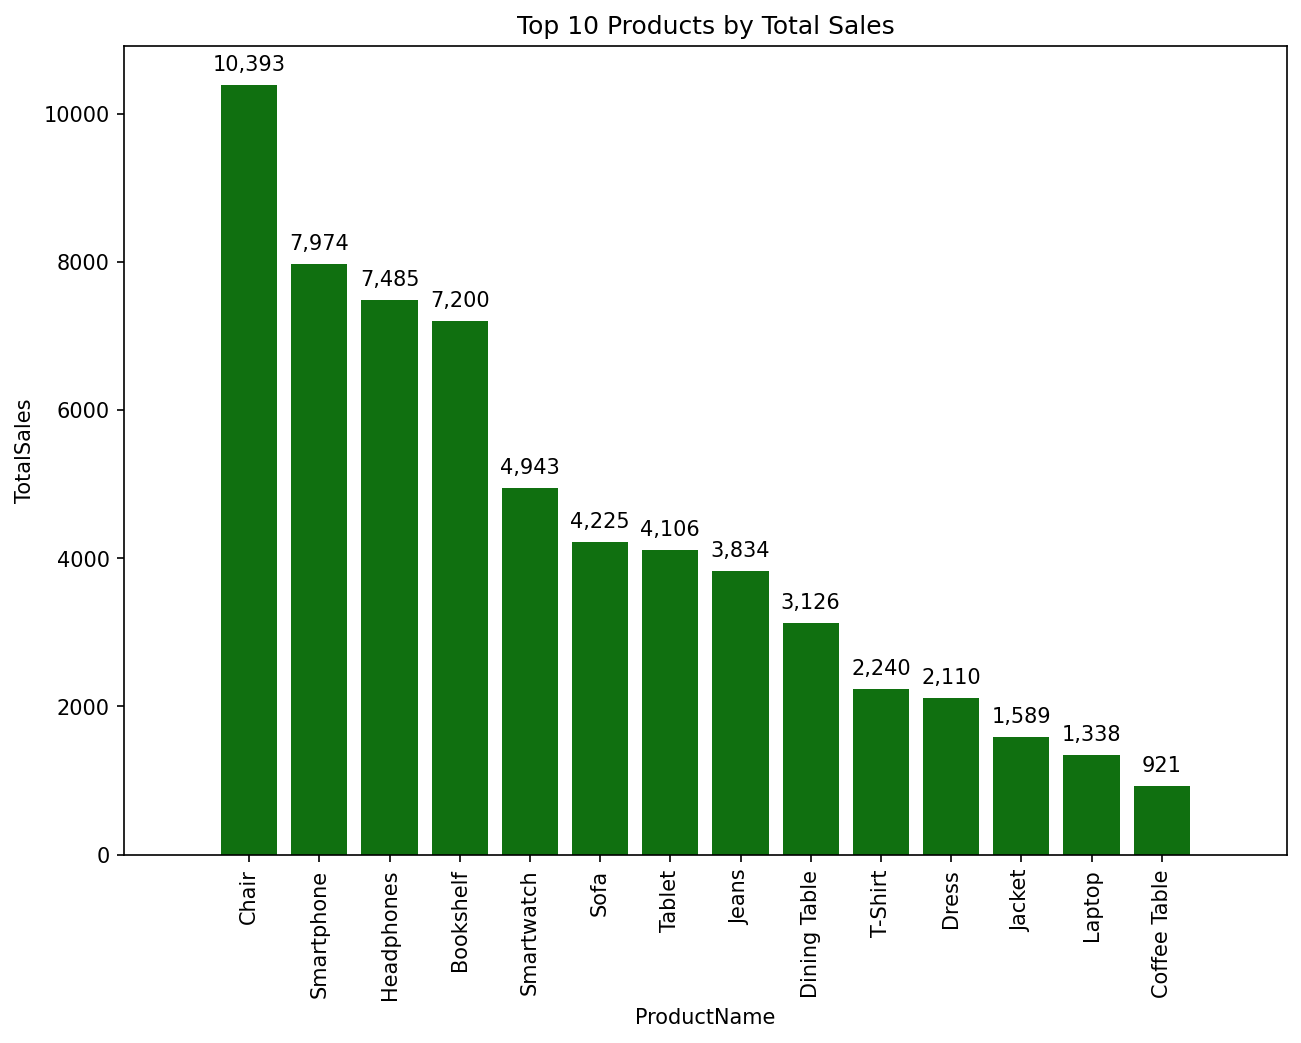

In [34]:
plt.figure(figsize = (10,7) , dpi = 150)
ax = sns.barplot(data = top_10_products, x = 'ProductName', y = 'TotalSales', color = 'green')
plt.title('Top 10 Products by Total Sales')

ax.margins(x=0.1)
for i in ax.containers:
    ax.bar_label(i, fmt='{:,.0f}', padding=5)
plt.xticks(rotation = 90);

In [35]:
# Customer with Maximum Sales per Category
customer_max_sales = sales_data.groupby(['CustomerName', 'Category'], observed=False)['TotalSales'].sum().reset_index()
customer_max_sales.sort_values(by='TotalSales', ascending=False, inplace=True)
customer_max_sales.reset_index(drop=True, inplace=True)
max_5_customer_sales = customer_max_sales.head(5)
max_5_customer_sales


,CustomerName,Category,TotalSales
0,Crystal Porter,Clothing,4690.00
1,Cheryl Riley,Electronics,3921.40
2,Dorothy Santana,Clothing,3322.30
3,Pamela Dodson,Clothing,3283.52
4,Mark Adams,Clothing,3230.73


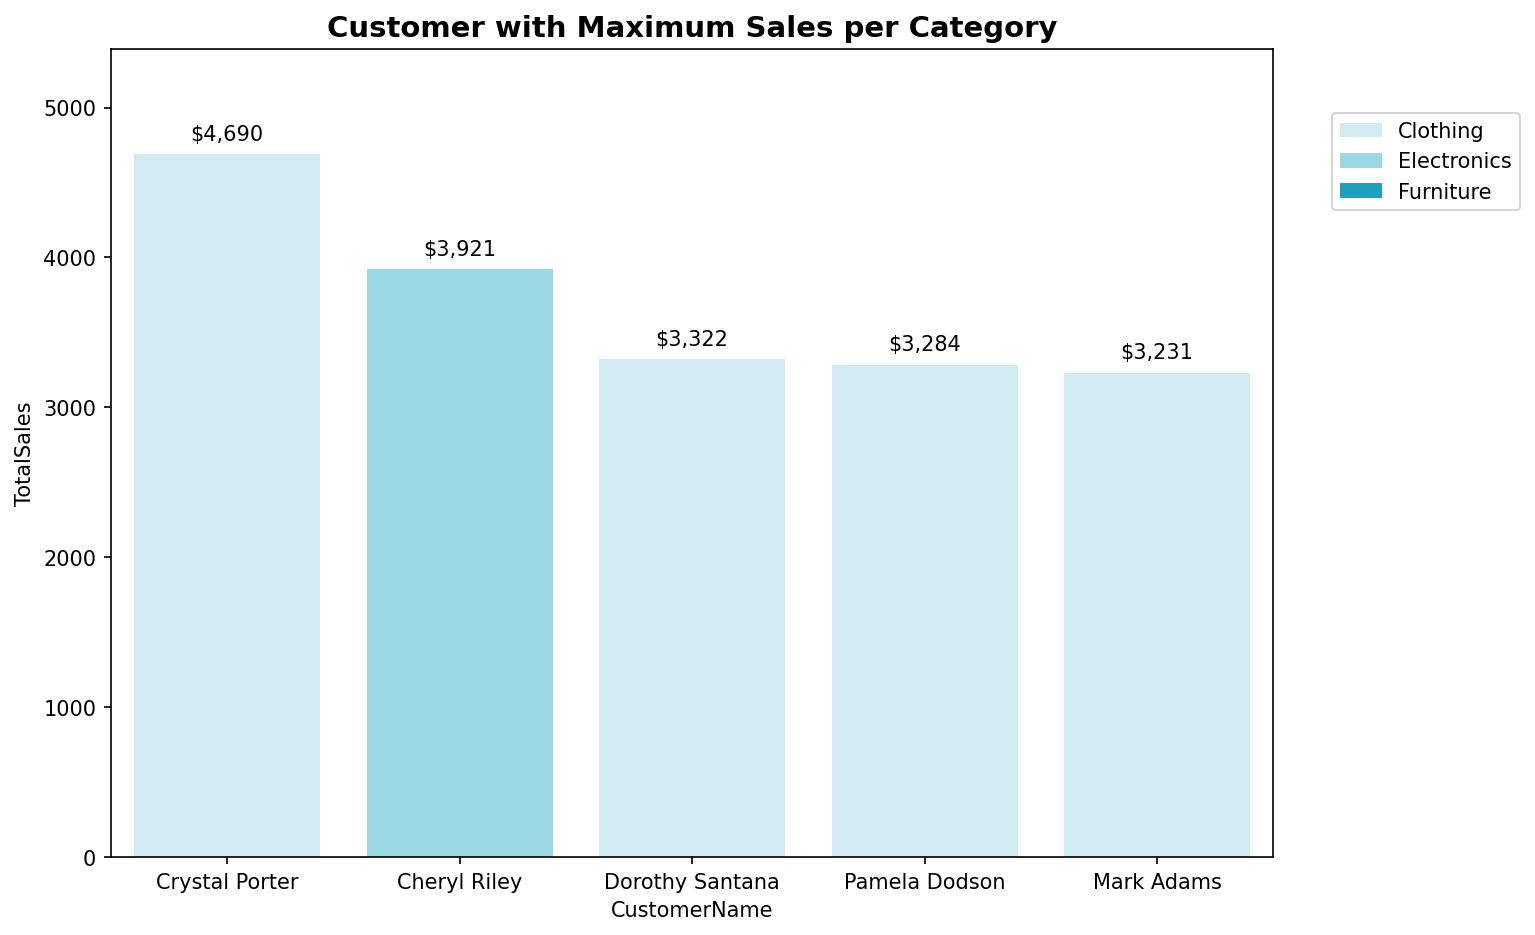

In [36]:
# barplot customer_max_sales
plt.figure(figsize = (10,7), dpi = 150)
ax = sns.barplot(x='CustomerName', y='TotalSales', data=max_5_customer_sales, hue = 'Category', palette=['#caf0f8', '#90e0ef', '#00b4d8'])
ax.margins(y = 0.15)
plt.title('Customer with Maximum Sales per Category', fontsize = 14, fontweight = 'bold')

for i in ax.containers:
    ax.bar_label(i, fmt = '${:,.0f}', padding = 5)

plt.legend(loc = (1.05, 0.8));



# New Section

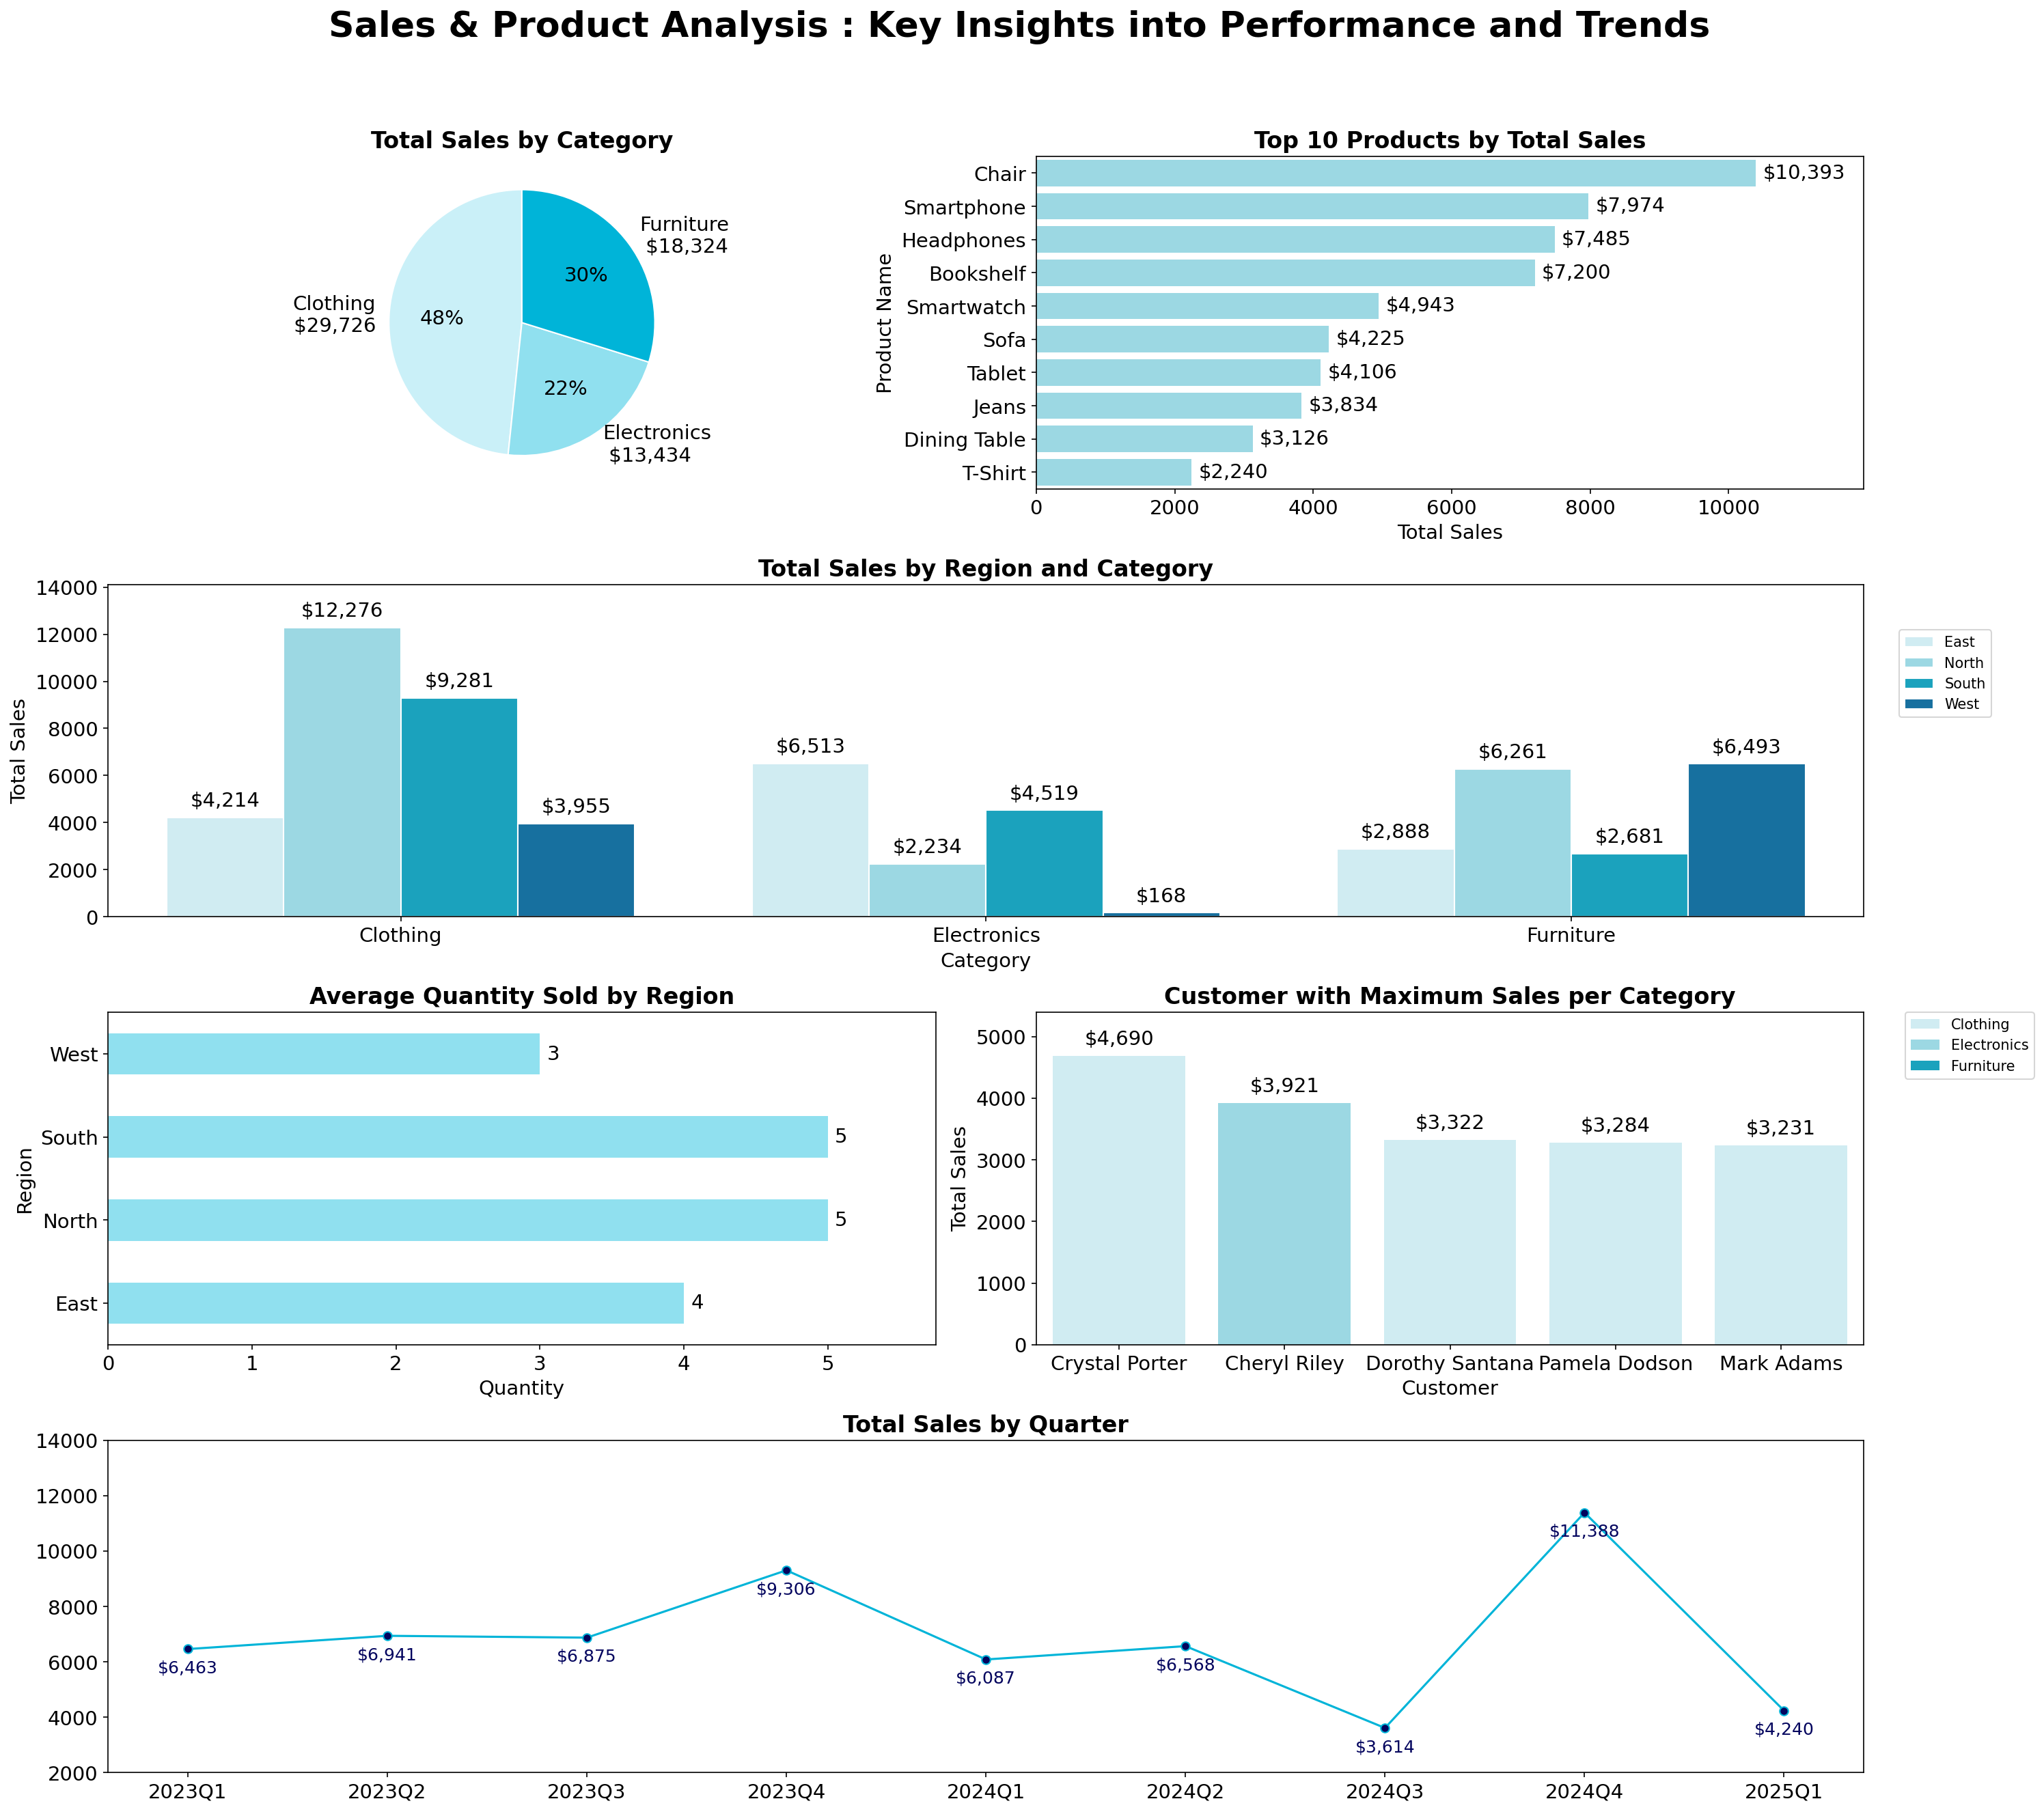

In [44]:
fig = plt.figure(figsize = (20,18), dpi = 150)

gs = GridSpec(4, 2, figure=fig)  # 4 rows, 2 columns grid layout

ax1 = fig.add_subplot(gs[0, 0])  # Pie: Total Sales by Category
ax2 = fig.add_subplot(gs[0, 1])  # Horizontal Bar: Top 10 Products by Total Sales
ax3 = fig.add_subplot(gs[1, :])  # Grouped Bar: Total Sales by Region and Category
ax4 = fig.add_subplot(gs[2, 0])  # Horizontal Bar: Average Quantity Sold by Region
ax5 = fig.add_subplot(gs[2, 1])  # Bar: Customer with Maximum Sales per Category
ax6 = fig.add_subplot(gs[3, :])  # Line: Total Sales by Quarter

plt.suptitle('Sales & Product Analysis : Key Insights into Performance and Trends', fontsize = 25, fontweight = 'bold')

# Pie: Total Sales by Category
sales_by_category = sales_data.groupby('Category', observed = False)['TotalSales'].sum().round()
labels = [f'{category}\n ${value:,.0f}' for category, value in zip(sales_by_category.index, sales_by_category)]
ax1.pie(
    sales_by_category,
    autopct = '%0.0f%%',
    startangle = 90,
    labels = labels,
    colors = ['#caf0f8', '#90e0ef', '#00b4d8'],
    textprops = {'fontsize': 14},
    wedgeprops = {'edgecolor': 'white'}
)
ax1.set_title('Total Sales by Category', fontsize = 16, fontweight = 'bold')


# Horizontal Bar: Top 10 Products by Total Sales
top_products_sales = (
    sales_data.groupby('ProductName')['TotalSales']
    .sum()
    .round()
    .sort_values(ascending = False)
    .iloc[:10]
    .reset_index()
)
ax2 = sns.barplot(
    top_products_sales,
    x = 'TotalSales',
    y = 'ProductName',
    color = '#90e0ef',
    ax = ax2
)
ax2.margins(x = 0.15)
ax2.set_title('Top 10 Products by Total Sales', fontsize = 16, fontweight = 'bold')
ax2.set_xlabel('Total Sales', fontsize = 14)
ax2.set_ylabel('Product Name', fontsize = 14)
ax2.tick_params(axis = 'both', labelsize = 14)

for i in ax2.containers:
    ax2.bar_label(i, fmt = '${:,.0f}', fontsize = 14, padding = 5)

# Grouped Bar: Total Sales by Region and Category
grouped_data = sales_data.groupby(['Region', 'Category'], observed = False)['TotalSales'].sum().round().reset_index()
ax3 = sns.barplot(
    grouped_data,
    x = 'Category',
    y = 'TotalSales',
    hue = 'Region',
    palette = ['#caf0f8', '#90e0ef', '#00b4d8', '#0077b6'],
    edgecolor = 'white',
    ax = ax3
)
ax3.margins(y=0.15)
ax3.set_title('Total Sales by Region and Category', fontsize = 16, fontweight = 'bold')
ax3.set_xlabel('Category', fontsize = 14)
ax3.set_ylabel('Total Sales', fontsize = 14)
ax3.tick_params(axis = 'both', labelsize = 14)

for i in ax3.containers:
    ax3.bar_label(i, fmt = '${:,.0f}', fontsize = 14, padding = 5)
ax3.legend(loc = (1.02, 0.6));

# Horizontal Bar: Average Quantity Sold by Region
avg_qty_sold_by_region = sales_data.groupby('Region', observed = False)['Quantity'].mean().round()
ax4 = avg_qty_sold_by_region.plot( kind = 'barh', color = '#90e0ef', ax = ax4)

ax4.margins(x=0.15)
for i in ax4.containers:
    ax4.bar_label(i, fmt = '{:,.0f}', fontsize = 14, padding = 5)

ax4.set_title('Average Quantity Sold by Region', fontsize = 16, fontweight = 'bold')
ax4.set_ylabel('Region', fontsize = 14)
ax4.set_xlabel('Quantity', fontsize = 14)
ax4.tick_params(axis = 'both', labelsize = 14)


# Bar: Customer with Maximum Sales per Category
ax5 = sns.barplot(
    x='CustomerName',
    y='TotalSales',
    data=max_5_customer_sales,
    hue = 'Category',
    palette=['#caf0f8', '#90e0ef', '#00b4d8'],
    ax = ax5
)
ax5.margins(y = 0.15)
ax5.set_title('Customer with Maximum Sales per Category', fontsize = 16, fontweight = 'bold')
ax5.set_xlabel('Customer', fontsize = 14)
ax5.set_ylabel('Total Sales', fontsize = 14)
ax5.tick_params(axis = 'both', labelsize = 14)

for i in ax5.containers:
    ax5.bar_label(i, fmt = '${:,.0f}', fontsize = 14, padding = 5)

ax5.legend(loc = (1.05, 0.8))

# Line: Total Sales by Quarter
line_data = sales_data.groupby(sales_data['OrderDate'].dt.to_period('Q'))['TotalSales'].sum().round()
line = plt.plot(line_data.index.astype(str), line_data, marker = 'o', markerfacecolor = '#03045e',color = '#00b4d8')[0]

ymin, ymax = line.get_ydata().min(), line.get_ydata().max()
offset = (ymax - ymin) * 0.05
ax6.set_title('Total Sales by Quarter', fontsize = 16, fontweight = 'bold')
ax6.set_ylim(2000, 14000)
ax6.tick_params(axis = 'both', labelsize = 14)

for x, y in zip(line.get_xdata(), line.get_ydata()):
    plt.text(x, y - offset, f'${y:,.0f}', ha = 'center', va = 'top', fontsize = 12, color = '#03045e')


plt.tight_layout(rect = [0, 0, 1, 0.95])
plt.savefig('Sales_&_Product_Analysis.png')
plt.show()
